In [42]:
import numpy as np
import matplotlib.pyplot as plt

class IMF_salpeter():
    default_mmin = 0.3
    default_mmax = 120


    def __init__(self, alpha=2.35, mmin=None, mmax=None):

        self._mmin = self.default_mmin if mmin is None else mmin
        self._mmax = self.default_mmax if mmax is None else mmax
        
        self.alpha = alpha
        self.normfactor = 1

        self.slope = -alpha
        assert (self._mmin < self._mmax)
        assert (self._mmin > 0)
        assert (self._mmin != -1)


    def pdf(self, x):
        norm = (self.slope + 1) / (
            self._mmax**(self.slope + 1) -
            self._mmin **(self.slope + 1))
        
        is_is_range = (x >= self._mmin ) * (x <= self._mmax)

        return x**self.slope * norm * is_is_range
    

    def cdf(self, x):
        is_in_range= (np.clip(x, self._mmin , self._mmax))
        return (is_in_range**(self.slope + 1) -
                (self._mmin**(self.slope + 1))) / (self._mmax**(self.slope + 1) -
                                                self._mmin**(self.slope + 1))
    

    def generate_masses(self, num_samples):
        u = np.random.uniform(0, 1, num_samples)
        m_min, m_max = self._mmin, self._mmax
        alpha = self.slope
        masses = ((u * (m_max**(alpha + 1) - m_min**(alpha + 1)) + m_min**(alpha + 1))**(1 / (alpha + 1)))
        return masses

    def __call__(self, m, integral_form=False):
        if not integral_form:
            return self.pdf(m) * self.normfactor
        else:
            return self.cdf(m) * self.normfactor


In [48]:
sal = IMF_salpeter(mmin=10, mmax=120)
masses = sal.generate_masses(10000)

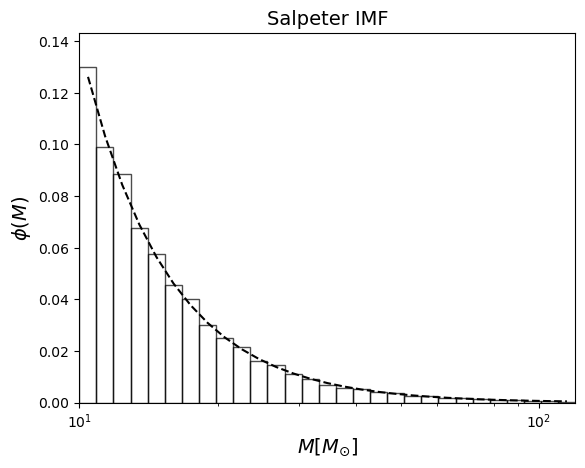

In [49]:
bins = np.logspace(np.log10(sal._mmin), np.log10(sal._mmax), 30)
hist, bin_edges = np.histogram(masses, bins=bins, density=True)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

density = sal.__call__(bin_centers, integral_form=False)

plt.figure()
plt.bar(bin_centers, hist, width=np.diff(bin_edges), edgecolor='black', align='center', alpha=0.7, fill=False)
plt.plot(bin_centers, density, 'k--')

plt.xscale('log')
plt.yscale('linear')
plt.ylabel(r'$\phi(M)$', fontsize=14)
plt.xlabel(r'$M [M_{\odot}]$', fontsize=14)
plt.title('Salpeter IMF', fontsize=14)
plt.xlim(sal._mmin, sal._mmax)
plt.ylim(0, np.max(hist) * 1.1)
plt.show()